In [12]:
import pandas as pd

csv_uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
data = pd.read_csv(csv_uri)

data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [13]:
swap_finished_value = {
    0: 1,
    1: 0
}

data['finished'] = data['unfinished'].map(swap_finished_value)

data.drop('unfinished', inplace=True, axis=1)
data.head()

,expected_hours,price,finished
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

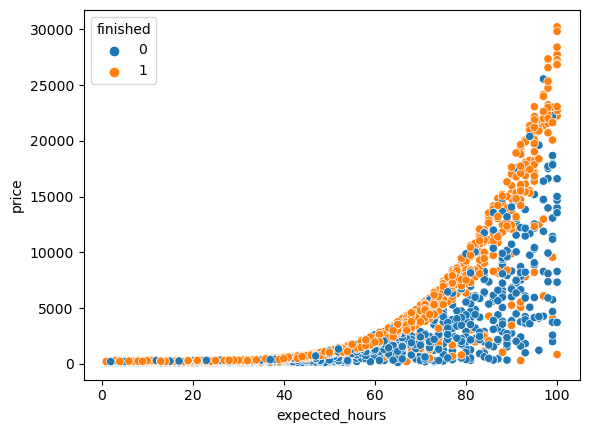

In [14]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

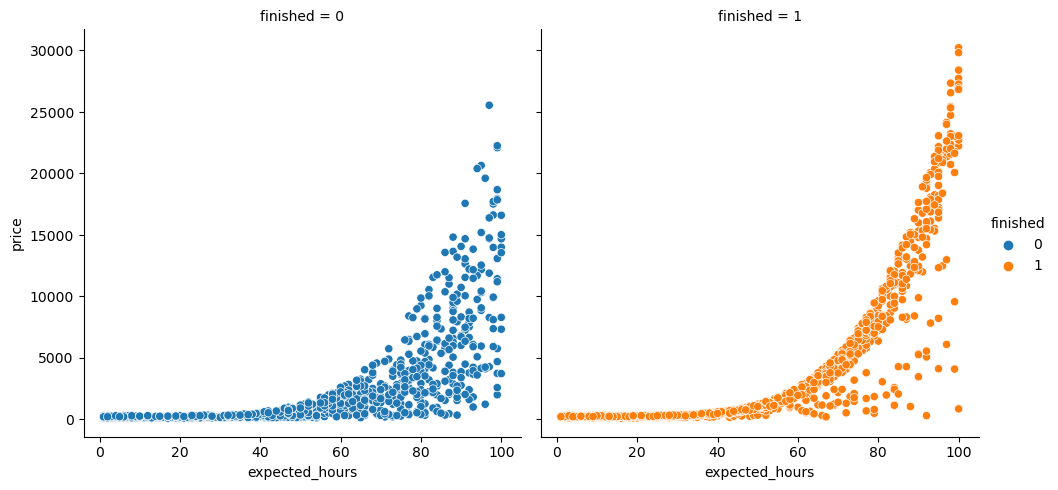

In [15]:
sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data=data)

In [16]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = data[['expected_hours', 'price']]
y = data['finished']

RANDOM_STATE_SEED=20

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=RANDOM_STATE_SEED, test_size=0.25, stratify=y)

model = LinearSVC()
model.fit(train_x, train_y)

predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100

print(f'Elementos de treino: {len(train_x)}')
print(f'Elementos de test: {len(test_x)}')
print(f'Taxa de acerto: {accuracy}%')

Elementos de treino: 1617
Elementos de test: 540
Taxa de acerto: 52.59259259259259%


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [17]:
import numpy as np
base_predictions = np.ones(len(test_x))

accuracy = accuracy_score(test_y, base_predictions) * 100
print(f'Taxa de acerto base foi: {accuracy}%')

Taxa de acerto base foi: 52.59259259259259%


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = data[['expected_hours', 'price']]
y = data['finished']

RANDOM_STATE_SEED=20
np.random.seed(RANDOM_STATE_SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

model = SVC()
model.fit(train_x, train_y)

predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100

print(f'Elementos de treino: {len(train_x)}')
print(f'Elementos de test: {len(test_x)}')
print(f'Taxa de acerto: {accuracy}%')

Elementos de treino: 1617
Elementos de test: 540
Taxa de acerto: 53.148148148148145%


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


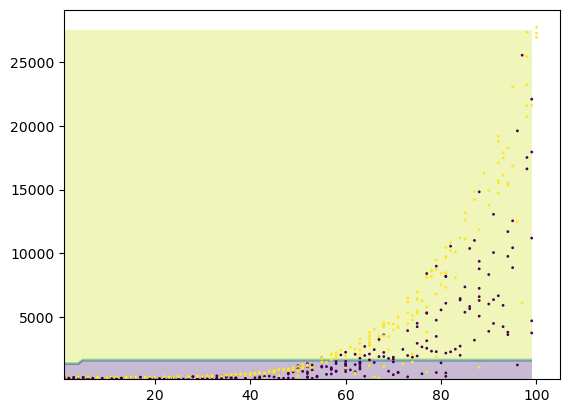

In [22]:
x_min = test_x['expected_hours'].min()
x_max = test_x['expected_hours'].max()

y_min = test_x['price'].min()
y_max = test_x['price'].max()

pixels = 100

axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x['expected_hours'], test_x['price'], c=test_y, s=1)